In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Baseline 2607

## Local Results

In [2]:
path_to_files = 'ignore/fl_baseline_2607/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [4]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,547.251205,0.250284,0.243905,0.858251
1,0,1,1,539.221216,0.251604,0.239218,0.840384
2,0,2,1,547.093563,0.249169,0.245277,0.843655
3,0,3,1,541.063658,0.249805,0.236973,0.841698
4,0,4,1,531.450186,0.255110,0.226038,0.848191


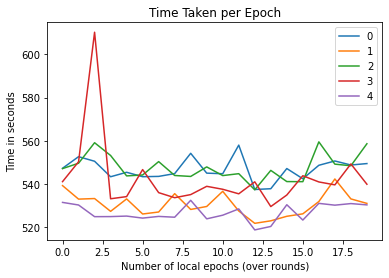

In [5]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

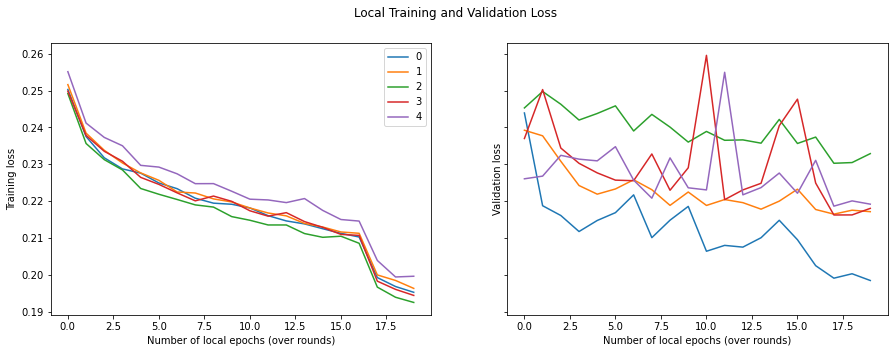

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

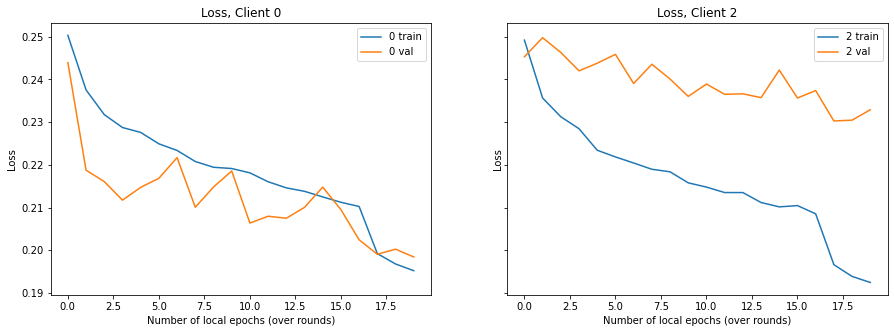

In [7]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

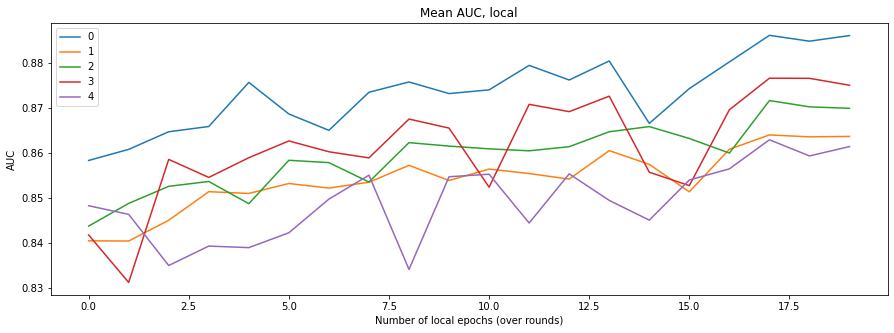

In [8]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [13]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=None)

In [14]:
global_df

,round,val AUC
0,0,0.849780
1,1,0.857819
2,2,0.861257
3,3,0.861078
4,4,0.862251
5,5,0.866738
6,6,0.866169
7,7,0.868179
8,8,0.868667
9,9,0.868581


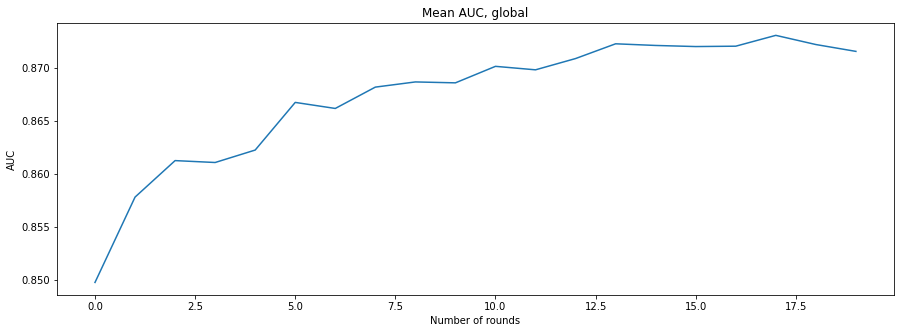

In [15]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# Baseline with New Client

## Local Results

In [6]:
path_to_files = 'ignore/fl_baseline_2707_mndly/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0, sep=',')

In [7]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,548.579767,0.248869,0.221755,0.852441
1,0,1,1,529.464365,0.251537,0.232833,0.841138
2,0,2,1,545.181064,0.246964,0.256573,0.845389
3,0,3,1,548.539104,0.248789,0.236335,0.845111
4,0,4,1,527.693710,0.253632,0.235117,0.835871


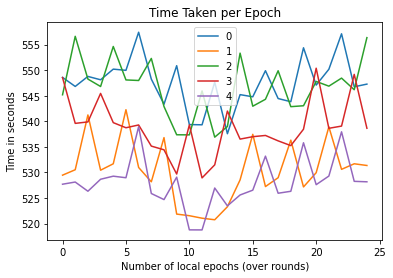

In [10]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

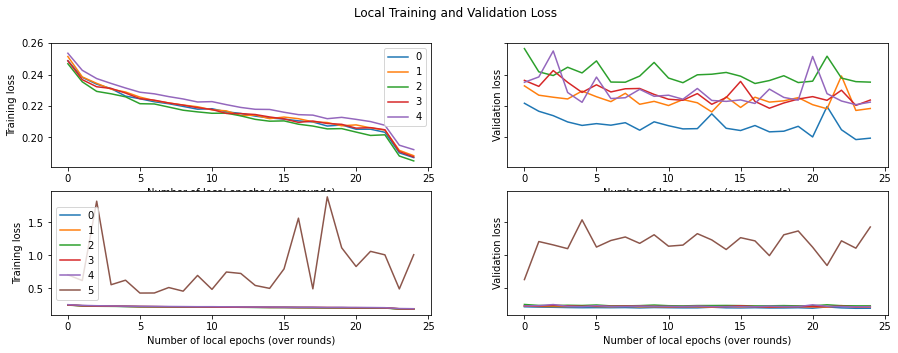

In [18]:
fig, ax = plt.subplots(2,2, sharey='row', figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0,0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0,0].legend()
ax[0,0].set_xlabel('Number of local epochs (over rounds)')
ax[0,0].set_ylabel('Training loss')

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0,1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[0,1].set_xlabel('Number of local epochs (over rounds)')
ax[0,1].set_ylabel('Validation loss')

for i in range(6):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1,0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[1,0].legend()
ax[1,0].set_xlabel('Number of local epochs (over rounds)')
ax[1,0].set_ylabel('Training loss')


for i in range(6):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1,1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1,1].set_xlabel('Number of local epochs (over rounds)')
ax[1,1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

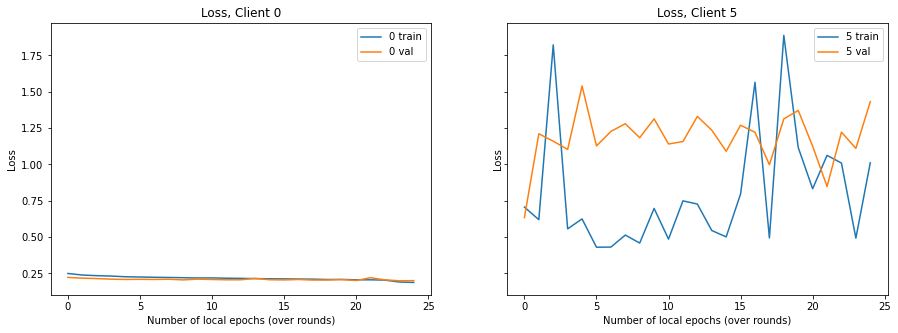

In [22]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [5]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 5')


plt.show()

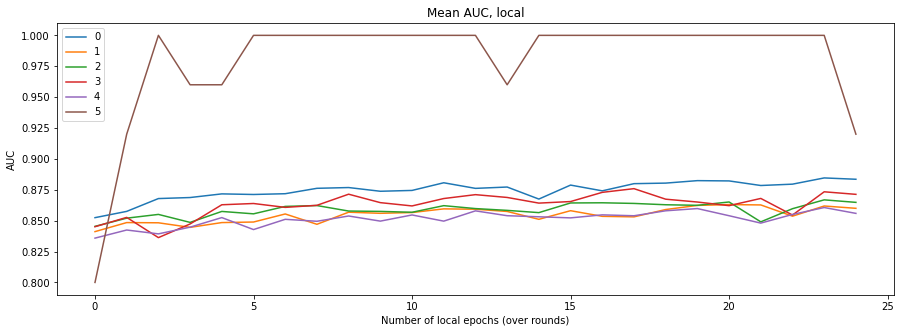

In [24]:
fig = plt.figure(figsize=(15,5))

for i in range(6):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [25]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=0)

In [26]:
global_df

,val AUC
round,
0,0.869078
1,0.881479
2,0.876159
3,0.878341
4,0.885663
5,0.888402
6,0.888691
7,0.889059
8,0.883604


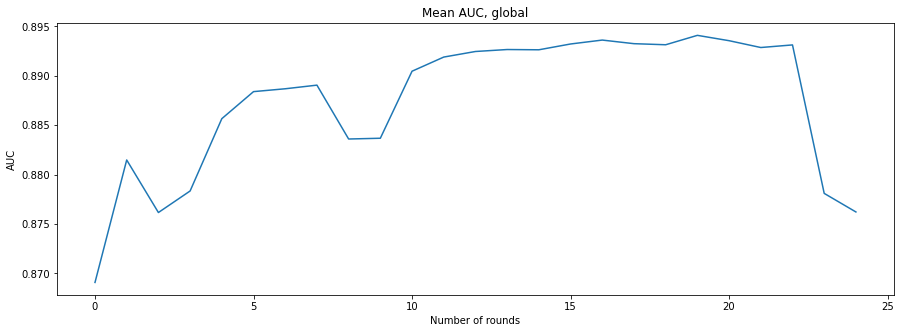

In [27]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df.index, global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()